In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [129]:
from PIL import Image

In [50]:
raw_fp = '../../data/TSLA/ProcData/'
f_name = 'merge_filter_data.csv'
data_wt_vol_name = 'feat_eng_data.csv'

In [77]:
data_market_name = 'data_market.csv'

Data 8:30 - 9:30

In [29]:
raw_file = os.path.join(raw_fp, f_name)
raw_data = pd.read_csv(raw_file, parse_dates=['time'])

In [30]:
raw_data.head()

,time,open,high,low,close,volume
0,2021-01-15 09:30:00-05:00,853.97,854.5000,850.83,852.0700,27753
1,2021-01-15 09:29:00-05:00,853.00,854.5000,853.00,854.1500,12735
2,2021-01-15 09:28:00-05:00,853.25,853.2500,852.80,852.8000,3754
3,2021-01-15 09:27:00-05:00,853.24,853.2498,853.10,853.2498,2115
4,2021-01-15 09:26:00-05:00,852.98,853.2500,852.98,853.2500,3460


In [31]:
raw_data.time.min()

datetime.datetime(2019, 1, 30, 8, 30, tzinfo=tzoffset(None, -18000))

In [32]:
raw_data.time.max()

datetime.datetime(2021, 1, 15, 9, 30, tzinfo=tzoffset(None, -18000))

In [33]:
raw_data = raw_data.set_index('time')

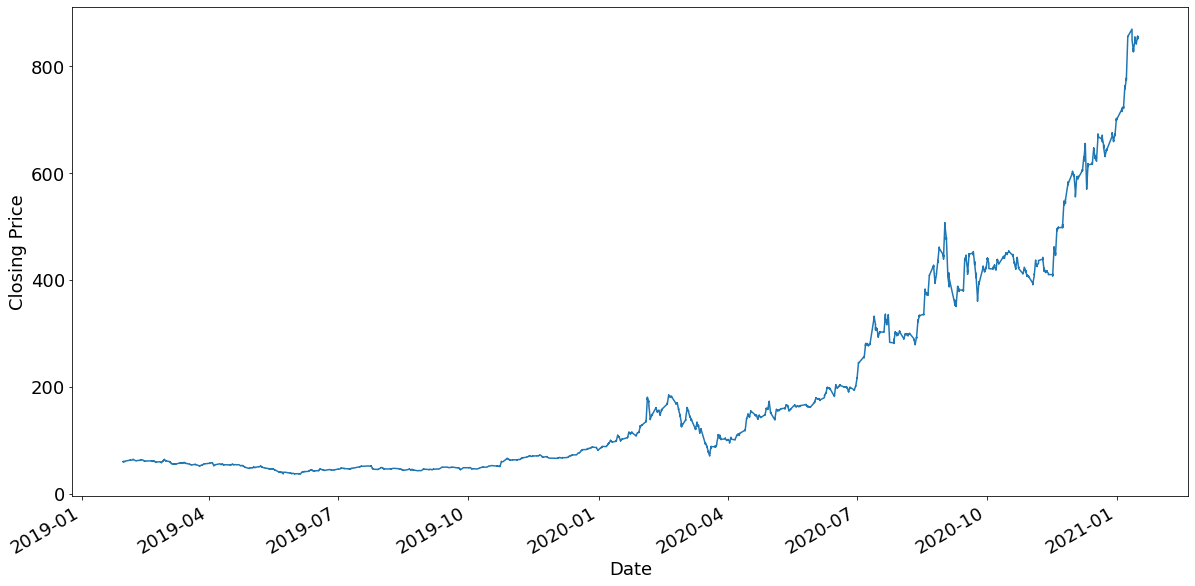

In [49]:
plt.figure(figsize=(20,10))
raw_data.close.plot(fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

# plt.figsave()

In [51]:
data_wt_vol_fp = os.path.join(raw_fp, data_wt_vol_name)

In [53]:
data_wt_vol = pd.read_csv(data_wt_vol_fp, parse_dates=['time'])
data_wt_vol.head()

,time,open,high,low,close,volume,diff,Volatility
0,2021-01-15 09:26:00-05:00,852.98,853.25,852.98,853.25,3460,0.27,1.20796
1,2021-01-15 09:25:00-05:00,852.75,853.00,852.75,852.85,4066,0.25,0.52396
2,2021-01-15 09:24:00-05:00,853.20,853.20,852.50,852.80,5050,0.70,0.36396
3,2021-01-15 09:23:00-05:00,853.43,853.45,853.25,853.25,3859,0.20,0.31396
4,2021-01-15 09:22:00-05:00,853.50,853.50,853.50,853.50,1805,0.00,0.28400


In [61]:
data_vol_20210115 = data_wt_vol.loc[data_wt_vol.time.apply(lambda x:x.date()==data_wt_vol.time[0].date())].set_index('time')
data_vol_20210115.head()

,open,high,low,close,volume,diff,Volatility
time,,,,,,,
2021-01-15 09:26:00-05:00,852.98,853.25,852.98,853.25,3460,0.27,1.20796
2021-01-15 09:25:00-05:00,852.75,853.00,852.75,852.85,4066,0.25,0.52396
2021-01-15 09:24:00-05:00,853.20,853.20,852.50,852.80,5050,0.70,0.36396
2021-01-15 09:23:00-05:00,853.43,853.45,853.25,853.25,3859,0.20,0.31396
2021-01-15 09:22:00-05:00,853.50,853.50,853.50,853.50,1805,0.00,0.28400


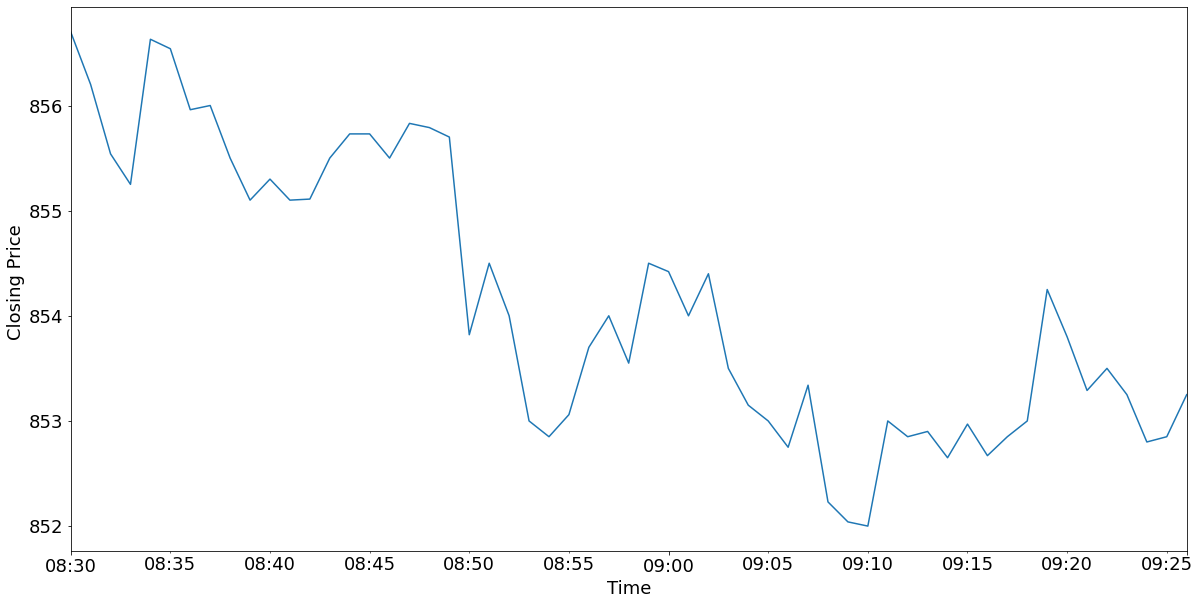

In [64]:
plt.figure(figsize=(20,10))
data_vol_20210115.close.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price ',fontsize=18)
plt.show()

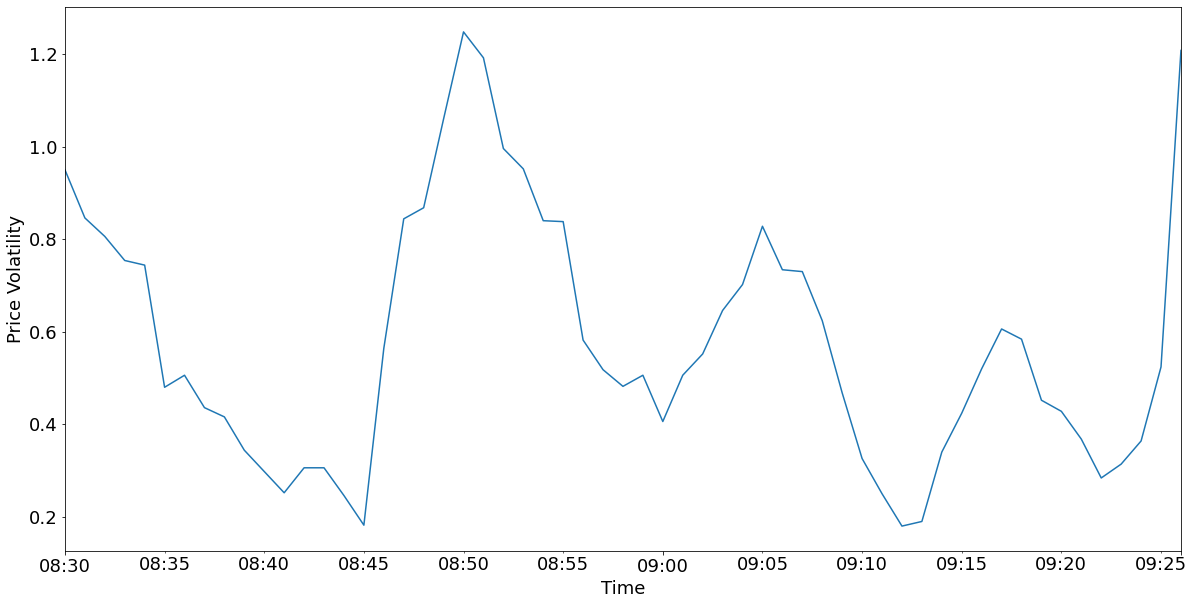

In [66]:
plt.figure(figsize=(20,10))
data_vol_20210115.Volatility.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price Volatility',fontsize=18)
plt.show()

### All: Concat 8:30 - end

In [78]:
dm_fp = os.path.join(raw_fp, data_market_name)
data_market = pd.read_csv(dm_fp, parse_dates=['time'])

In [79]:
data_market.head()

,time,open,high,low,close,volume,diff,Volatility
0,2021-01-15 15:56:00-05:00,826.36,826.84,825.25,826.1118,138839,1.59,1.16642
1,2021-01-15 15:55:00-05:00,827.58,827.58,825.34,826.4188,138145,2.24,1.38642
2,2021-01-15 15:54:00-05:00,827.53,827.78,827.24,827.6000,88786,0.54,1.37042
3,2021-01-15 15:53:00-05:00,826.97,827.58,826.76,827.5000,127116,0.82,1.30198
4,2021-01-15 15:52:00-05:00,825.52,827.19,825.34,826.9800,95808,1.85,1.40800


In [115]:
data_market_vol_20210115 = data_market.loc[data_market.time.apply(lambda x:x.date()==data_market.time[0].date())].set_index('time')
data_market_vol_20210115.head()

,open,high,low,close,volume,diff,Volatility
time,,,,,,,
2021-01-15 15:56:00-05:00,826.36,826.84,825.25,826.1118,138839,1.59,1.16642
2021-01-15 15:55:00-05:00,827.58,827.58,825.34,826.4188,138145,2.24,1.38642
2021-01-15 15:54:00-05:00,827.53,827.78,827.24,827.6000,88786,0.54,1.37042
2021-01-15 15:53:00-05:00,826.97,827.58,826.76,827.5000,127116,0.82,1.30198
2021-01-15 15:52:00-05:00,825.52,827.19,825.34,826.9800,95808,1.85,1.40800


In [116]:
data_all = pd.concat([data_vol_20210115, data_market_vol_20210115])
data_all.head()

,open,high,low,close,volume,diff,Volatility
time,,,,,,,
2021-01-15 09:26:00-05:00,852.98,853.25,852.98,853.25,3460,0.27,1.20796
2021-01-15 09:25:00-05:00,852.75,853.00,852.75,852.85,4066,0.25,0.52396
2021-01-15 09:24:00-05:00,853.20,853.20,852.50,852.80,5050,0.70,0.36396
2021-01-15 09:23:00-05:00,853.43,853.45,853.25,853.25,3859,0.20,0.31396
2021-01-15 09:22:00-05:00,853.50,853.50,853.50,853.50,1805,0.00,0.28400


In [118]:
data_all.reset_index().time.min()

Timestamp('2021-01-15 08:30:00-0500', tz='tzoffset(None, -18000)')

In [119]:
data_all.reset_index().time.max()

Timestamp('2021-01-15 15:56:00-0500', tz='tzoffset(None, -18000)')

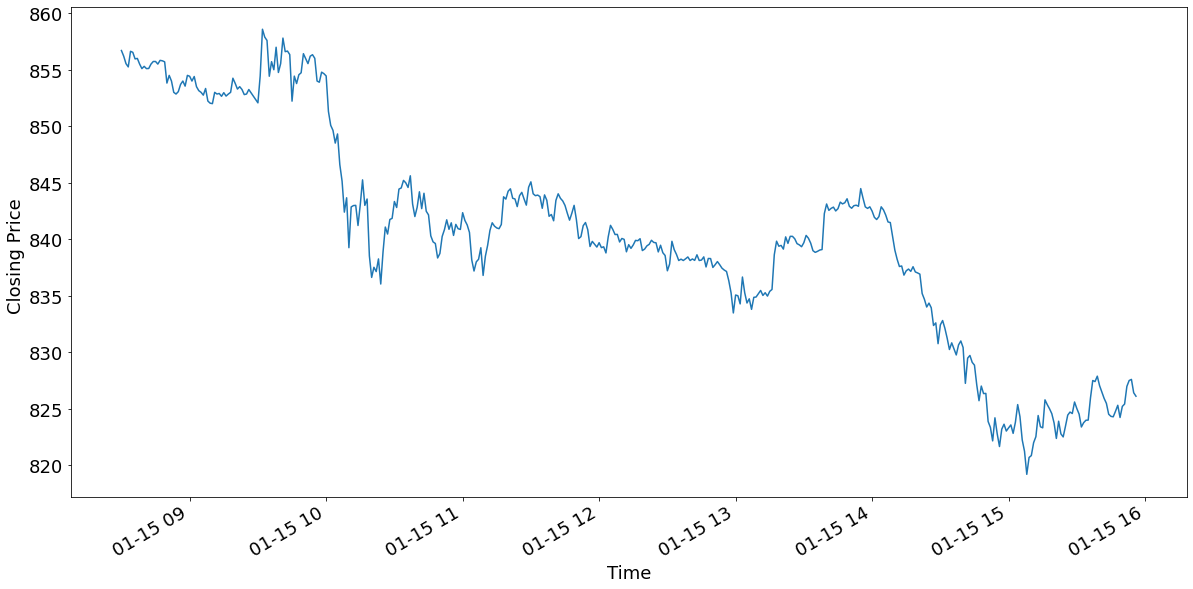

In [120]:
plt.figure(figsize=(20,10))
data_all.close.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price ',fontsize=18)
plt.show()

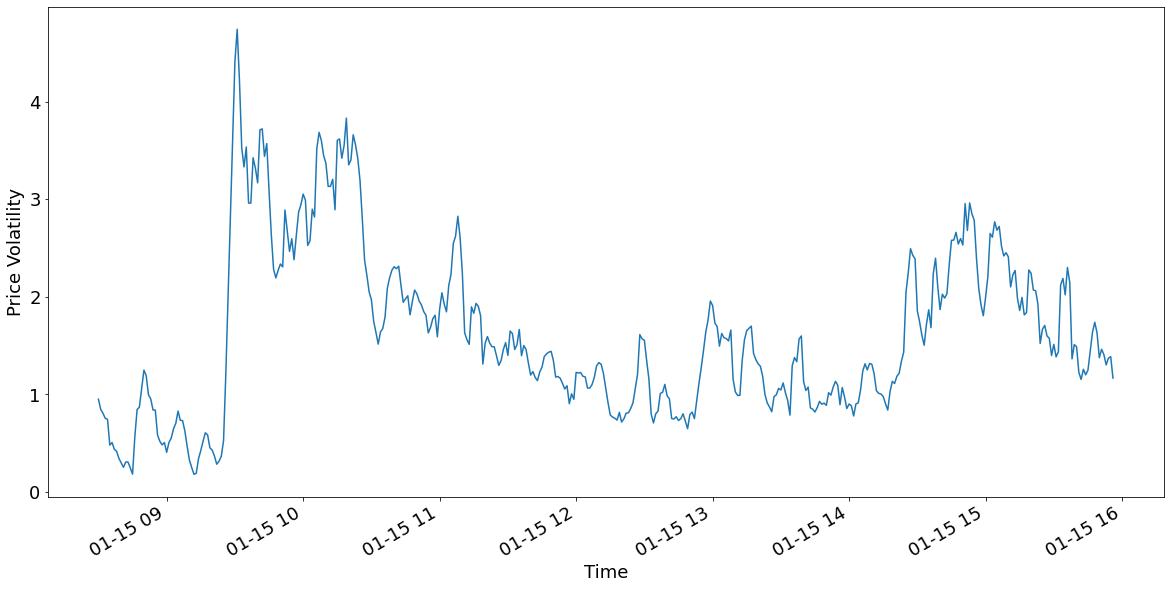

In [121]:
plt.figure(figsize=(20,10))
data_all.Volatility.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price Volatility',fontsize=18)
plt.show()

## Image Data

In [130]:
img_folder = '../../data/imgs'

In [122]:
gdf_ref_fn = 'gramian_date_img_reference.csv'
gdf_ref = pd.read_csv(os.path.join(raw_fp, gdf_ref_fn))

In [128]:
img_idx_20200115 = gdf_ref[gdf_ref.date=='2020-01-15'].index[0]
img_idx_20200115

242

In [133]:
# img_20200115 = img_folder+'/'+str(img_idx_20200115)

In [157]:
gramian_df = pd.read_csv(os.path.join(raw_fp, 'gramian_df.csv'))

In [158]:
gramian_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0646,0.0646,0.0802,0.079600,0.055600,0.026000,0.026000,0.006400,0.001200,0.005200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0328,0.0528,0.0648,0.087600,0.106800,0.110800,0.110804,0.100404,0.097604,0.102004,...,0.0204,0.024,0.0214,0.0374,NaN,NaN,NaN,NaN,NaN,NaN
2,0.1064,0.0792,0.0336,0.026000,0.032000,0.032000,0.032000,0.032000,0.012000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0004,0.0020,0.0080,0.010000,0.022000,0.028800,0.029200,0.026000,0.039600,0.043600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0160,0.0160,0.0360,0.033808,0.033808,0.020208,0.020208,0.000208,0.000000,0.000800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
gdf_df_20200115 = gramian_df.iloc[img_idx_20200115]

In [154]:
temp = gdf_df_20200115[:-1]

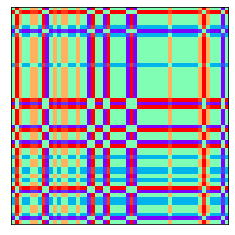

In [146]:
im = Image.open(img_folder+'/'+'2021-01-15.png')#.shape
im

In [148]:
im.size

(235, 235)

In [156]:
from sklearn.preprocessing import MinMaxScaler
from pyts.image import GramianAngularField

In [160]:
scaler = MinMaxScaler(feature_range=(-1,1))
# did not flatten the images
gadf = GramianAngularField(sample_range=(-1,1), method='difference')
curr_row = gramian_df.iloc[img_idx_20200115].dropna().to_frame().T
# Scale the data to be between -1 and 1
curr_feat = scaler.fit_transform(curr_row)
# gramian
curr_X_gadf = gadf.fit_transform(curr_feat)

In [165]:
pd.DataFrame(curr_X_gadf[:,:,1])

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,-2.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,...,-2.0,-2.0,-2.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0


In [166]:
curr_X_gadf

array([[[ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [-2., -2.,  0., ..., -2., -2., -2.],
        ...,
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.]]])